In [24]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('data_set.csv')
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [5]:
titles = list(data.columns)
titles

['Timestamp',
 '1. What is your age?',
 '2. Gender',
 '3. Relationship Status',
 '4. Occupation Status',
 '5. What type of organizations are you affiliated with?',
 '6. Do you use social media?',
 '7. What social media platforms do you commonly use?',
 '8. What is the average time you spend on social media every day?',
 '9. How often do you find yourself using Social media without a specific purpose?',
 '10. How often do you get distracted by Social media when you are busy doing something?',
 "11. Do you feel restless if you haven't used Social media in a while?",
 '12. On a scale of 1 to 5, how easily distracted are you?',
 '13. On a scale of 1 to 5, how much are you bothered by worries?',
 '14. Do you find it difficult to concentrate on things?',
 '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
 '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
 '17. How often do

#### Renaming Columns 

In [6]:
data.rename(columns = {'1. What is your age?':'Age',
                       '2. Gender':'Sex',
                       '3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [7]:
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [8]:
titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

#### Missing Value Detection and Treatment

In [9]:
# Check number of records in each column of the data set. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social Media User?   481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   ADHD Q1              481 non-null    int64  
 10  ADHD Q2              481 non-null    int64  
 11  ADHD Q3              481 non-null    int64  
 12  ADHD Q4              481 non-null    int64  
 13  Anxiety Q1           481 non-null    int64  
 14  Anxiety Q2           481 non-null    int64  
 15  Self Esteem Q1       481 non-null    int

There are no missing values as expected

#### Data Transformation

Gender

In [10]:
#List all the unique Gender/Sex entries.

Genders = set(data['Sex'])
print(Genders)

{'Non binary ', 'Trans', 'NB', 'Nonbinary ', 'There are others???', 'Female', 'Non-binary', 'Male', 'unsure '}


Responses stating "There are others???" will be disregarded as they indicate a lack of seriousness in completing the questionnaire. Therefore, entries containing this response will be excluded from consideration.

In [11]:
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)

In [12]:
Genders = set(data['Sex'])
print(Genders)

{'Non binary ', 'Trans', 'NB', 'Nonbinary ', 'Female', 'Non-binary', 'Male', 'unsure '}


There are numerous diverse entries in the Gender section, many of which could be categorized as "Others." This variety likely arose due to the open-ended nature of allowing users to select "Others" in the Gender section of the questionnaire.

In [13]:
#Combining the unique entries that all fall under the "Others" category
data.replace('Non-binary','Others', inplace=True)
data.replace('Nonbinary ','Others', inplace=True)
data.replace('NB','Others', inplace=True)
data.replace('unsure ','Others', inplace=True)
data.replace('Non binary ','Others', inplace=True)
data.replace('Trans','Others', inplace=True)

In [14]:
Genders = set(data['Sex'])
print(Genders)

{'Female', 'Others', 'Male'}


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            480 non-null    object 
 1   Age                  480 non-null    float64
 2   Sex                  480 non-null    object 
 3   Relationship Status  480 non-null    object 
 4   Occupation           480 non-null    object 
 5   Affiliations         450 non-null    object 
 6   Social Media User?   480 non-null    object 
 7   Platforms Used       480 non-null    object 
 8   Time Spent           480 non-null    object 
 9   ADHD Q1              480 non-null    int64  
 10  ADHD Q2              480 non-null    int64  
 11  ADHD Q3              480 non-null    int64  
 12  ADHD Q4              480 non-null    int64  
 13  Anxiety Q1           480 non-null    int64  
 14  Anxiety Q2           480 non-null    int64  
 15  Self Esteem Q1       480 non-null    int64  


Age

Note that 'Age' is erroneously detected as float64 value in the above section. This is because of the single data record # 382. We should thus convert the 'Age' column to int64 type

In [16]:
#Showing the age entry of record #382
data.loc[382,'Age']

26.7

In [17]:
#Converting Age from float64 to int64 and displaying record # 382
data['Age'] = data['Age'].astype('int64')

In [18]:
#float64 changed to int32
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            480 non-null    object
 1   Age                  480 non-null    int64 
 2   Sex                  480 non-null    object
 3   Relationship Status  480 non-null    object
 4   Occupation           480 non-null    object
 5   Affiliations         450 non-null    object
 6   Social Media User?   480 non-null    object
 7   Platforms Used       480 non-null    object
 8   Time Spent           480 non-null    object
 9   ADHD Q1              480 non-null    int64 
 10  ADHD Q2              480 non-null    int64 
 11  ADHD Q3              480 non-null    int64 
 12  ADHD Q4              480 non-null    int64 
 13  Anxiety Q1           480 non-null    int64 
 14  Anxiety Q2           480 non-null    int64 
 15  Self Esteem Q1       480 non-null    int64 
 16  Self Esteem Q

#### Data Visualisation

To begin, let's examine the data distribution concerning the time spent on social media for 471 participants.

<Axes: xlabel='Time Spent on Social Media', ylabel='Frequency'>

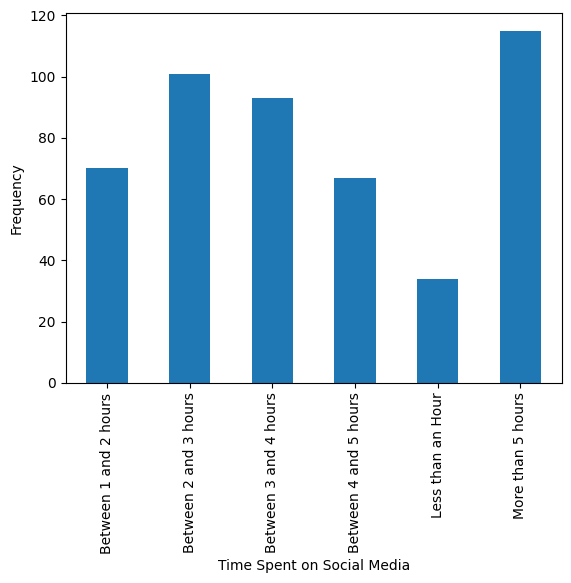

In [19]:
data.groupby('Time Spent').size().plot.bar(xlabel='Time Spent on Social Media', ylabel='Frequency')

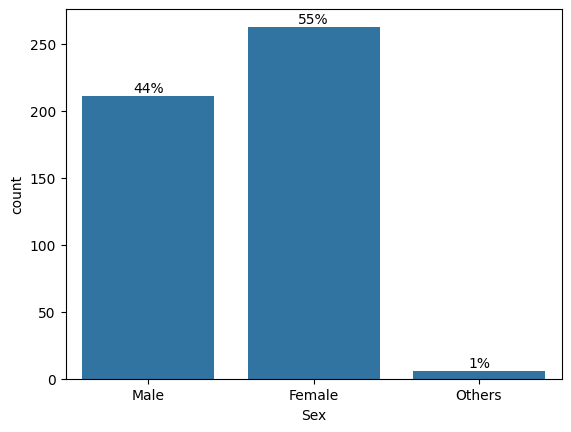

In [25]:
# Let's understand the distribution of data for 473 participants based on their Gender.

total=float(len(data))
ax = sns.countplot(x="Sex", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

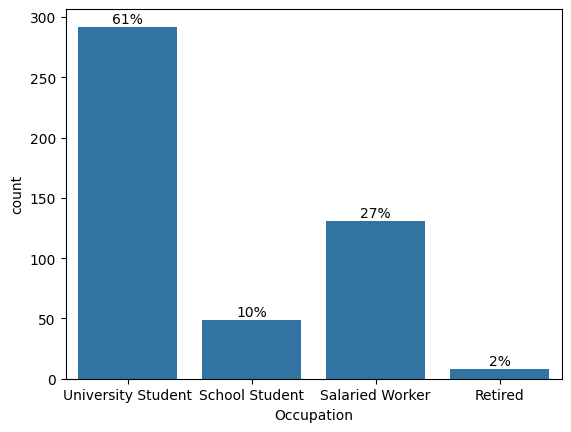

In [28]:
# Let's understand the distribution of data for 471 participants based on their Occupation.
total=float(len(data))
ax = sns.countplot(x="Occupation", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")